In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = '/content/drive/MyDrive/5CS037/diabetes.csv'
df = pd.read_csv(file_path)

# Display the first few rows
print("First 5 rows of the dataset:")
print(df.head())

# Perform EDA
print("\nData Types:")
print(df.dtypes)

print("\nSummary Statistics:")
print(df.describe())

print("\nMissing Values:")
print(df.isnull().sum())

First 5 rows of the dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Data Types:
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age      

In [ ]:
df_cleaned = df.dropna()

# Alternatively, impute missing values
# For numeric columns, fill with mean
df_cleaned.fillna(df.mean(), inplace=True)

print("\nMissing values after handling:")
print(df_cleaned.isnull().sum())


Missing values after handling:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


The code handles missing values in the dataset by first removing any rows with missing values using df.dropna(), and storing the result in df_cleaned

In [ ]:
target_column = 'Insulin'  # Replace with the actual target column name
X = df_cleaned.drop(columns=[target_column]).values
y = df_cleaned[target_column].values

# Train-test split (70% train, 30% test)
split_index = int(0.7 * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

print(f"\nTraining set size: {len(X_train)}, Test set size: {len(X_test)}")


Training set size: 537, Test set size: 231


This code snippet prepares the dataset for training a machine learning model by first defining the target column ('Insulin' in this case), which is the variable we want to predict. It then separates the dataset into features (X) and the target variable (y). The drop(columns=[target_column]) removes the target column ('Insulin') from the features, and df_cleaned[target_column] selects the target column for predictions

In [ ]:
import numpy as np
import pandas as pd

def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

def predict_single(X_train, y_train, query, k=3):
    distances = []
    for i in range(len(X_train)):
        dist = euclidean_distance(X_train[i], query)
        distances.append((dist, y_train[i]))

    distances = sorted(distances, key=lambda x: x[0])
    k_neighbors = [distances[i][1] for i in range(k)]

    return max(set(k_neighbors), key=k_neighbors.count)

def predict_all(X_train, y_train, X_test, k=3):
    predictions = []
    for query in X_test:
        prediction = predict_single(X_train, y_train, query, k)
        predictions.append(prediction)
    return predictions


file_path = "/content/drive/MyDrive/5CS037/diabetes.csv"
df = pd.read_csv(file_path)

X = df.drop(columns=["Outcome"]).values
y = df["Outcome"].values

split_index = int(0.7 * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

k = 3
y_pred = predict_all(X_train, y_train, X_test, k)

accuracy = np.mean(np.array(y_pred) == y_test)
print(f"\nAccuracy of the KNN model: {accuracy * 100:.2f}%")




Accuracy of the KNN model: 71.86%


This code implements the K-Nearest Neighbors (KNN) algorithm from scratch to classify data from a dataset.The code implements the KNN algorithm to classify whether a person has diabetes based on the features in the dataset. It splits the data into training and testing sets, uses the training data to make predictions on the test data, and calculates the accuracy of those predictions by comparing them to the actual test labels.

Problem - 2 - Experimentation:

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

def predict_single(X_train, y_train, query, k=3):
    distances = []
    for i in range(len(X_train)):
        dist = euclidean_distance(X_train[i], query)
        distances.append((dist, y_train[i]))
    distances = sorted(distances, key=lambda x: x[0])
    k_neighbors = [distances[i][1] for i in range(k)]
    return max(set(k_neighbors), key=k_neighbors.count)

def predict_all(X_train, y_train, X_test, k=3):
    predictions = []
    for query in X_test:
        prediction = predict_single(X_train, y_train, query, k)
        predictions.append(prediction)
    return predictions

file_path = "/content/drive/MyDrive/5CS037/diabetes.csv"
df = pd.read_csv(file_path)

X = df.drop(columns=["Outcome"]).values
y = df["Outcome"].values

split_index = int(0.7 * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

k = 3
y_pred = predict_all(X_train, y_train, X_test, k)
accuracy_unscaled = np.mean(np.array(y_pred) == y_test)

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_train_scaled, X_test_scaled = X_scaled[:split_index], X_scaled[split_index:]

y_pred_scaled = predict_all(X_train_scaled, y_train, X_test_scaled, k)
accuracy_scaled = np.mean(np.array(y_pred_scaled) == y_test)

print(f"Accuracy of KNN (unscaled data): {accuracy_unscaled * 100:.2f}%")
print(f"Accuracy of KNN (scaled data): {accuracy_scaled * 100:.2f}%")


Accuracy of KNN (unscaled data): 71.86%
Accuracy of KNN (scaled data): 76.62%


Scaling ensures all features contribute equally to the Euclidean distance calculation. Without scaling, features with larger ranges (e.g., "Insulin" or "Age") dominate the distance metric, skewing the results.If the accuracy improves, it indicates that scaling mitigated the effects of irrelevant feature dominance.
If the accuracy does not change significantly, it suggests that the dataset features were already well-aligned in terms of range or that the dominant features were truly significant predictors.

**Problem - 3 - Experimentation with k:**

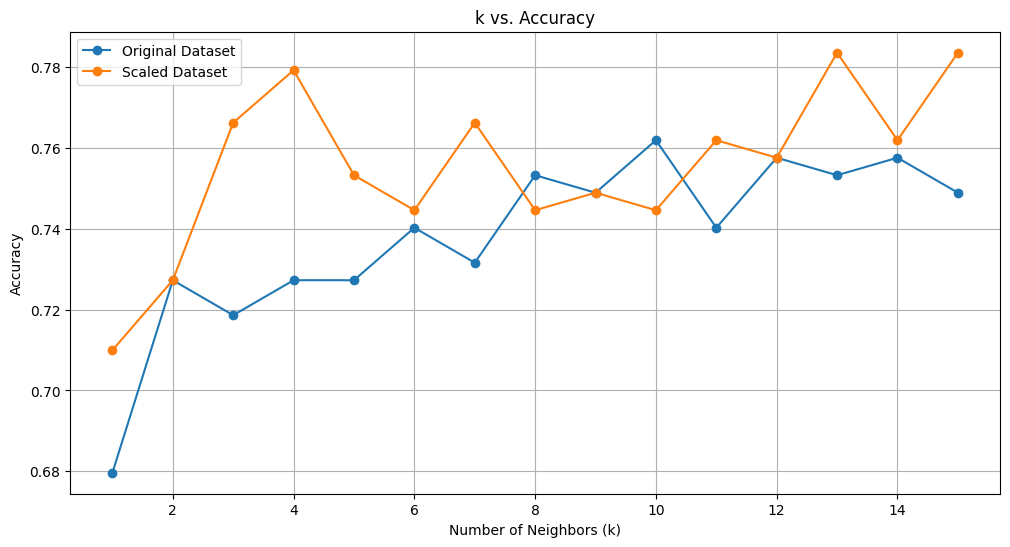

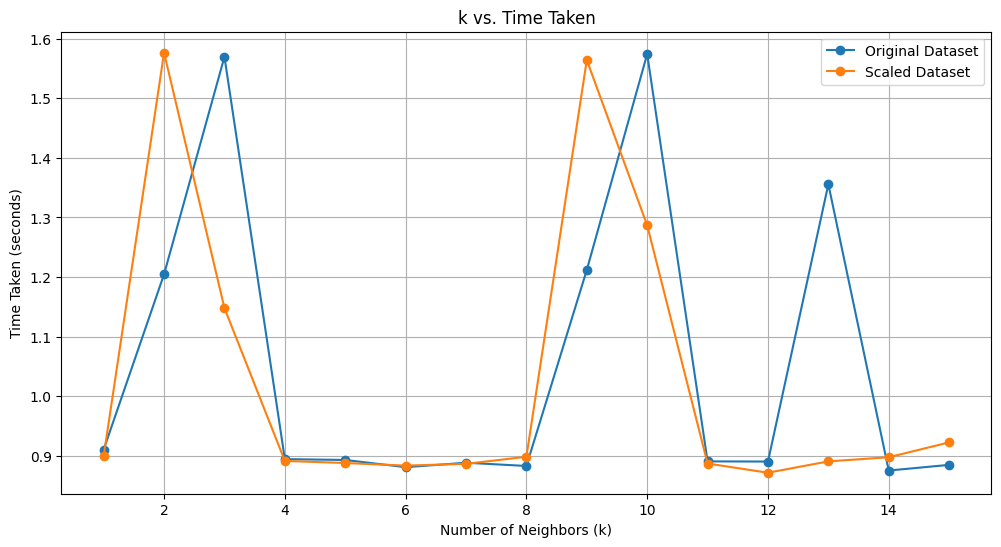

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import time
import matplotlib.pyplot as plt

# Load your dataset
file_path = "/content/drive/MyDrive/5CS037/diabetes.csv"
df = pd.read_csv(file_path)


target_column = "Outcome"
X = df.drop(columns=[target_column]).values
y = df[target_column].values


split_index = int(0.7 * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_train_scaled, X_test_scaled = X_scaled[:split_index], X_scaled[split_index:]

def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

def predict_single(X_train, y_train, query, k):
    distances = []
    for i in range(len(X_train)):
        dist = euclidean_distance(X_train[i], query)
        distances.append((dist, y_train[i]))
    distances = sorted(distances, key=lambda x: x[0])
    k_neighbors = [distances[i][1] for i in range(k)]
    return max(set(k_neighbors), key=k_neighbors.count)

def predict_all(X_train, y_train, X_test, k):
    predictions = []
    for query in X_test:
        prediction = predict_single(X_train, y_train, query, k)
        predictions.append(prediction)
    return predictions

k_values = range(1, 16)
accuracy_original, accuracy_scaled = [], []
time_original, time_scaled = [], []

for k in k_values:

    start_time = time.time()
    y_pred = predict_all(X_train, y_train, X_test, k)
    accuracy_original.append(np.mean(np.array(y_pred) == y_test))
    time_original.append(time.time() - start_time)

    start_time = time.time()
    y_pred_scaled = predict_all(X_train_scaled, y_train, X_test_scaled, k)
    accuracy_scaled.append(np.mean(np.array(y_pred_scaled) == y_test))
    time_scaled.append(time.time() - start_time)

plt.figure(figsize=(12, 6))
plt.plot(k_values, accuracy_original, label="Original Dataset", marker="o")
plt.plot(k_values, accuracy_scaled, label="Scaled Dataset", marker="o")
plt.title("k vs. Accuracy")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(k_values, time_original, label="Original Dataset", marker="o")
plt.plot(k_values, time_scaled, label="Scaled Dataset", marker="o")
plt.title("k vs. Time Taken")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Time Taken (seconds)")
plt.legend()
plt.grid()
plt.show()
